In [8]:
import numpy as np
import matplotlib.pyplot as plt
import datetime


In [90]:
filename = '2169715.csv'
date = []
data = []
with open(filename) as f:
    HEADER = np.array(f.readline())
    
    for line in f:
        
        dataline = f.readline()
        if dataline != '':
            dataline = dataline[:-1].replace('T',',').replace(':',',').replace('-',',',1).split(',')
            dataline = list(map(float, dataline))
            
            time = datetime.datetime(1,int(dataline[0]),int(dataline[1]),int(dataline[2]),int(dataline[3]))
            data.append(dataline)
            date.append(time)
            
    #DATA = np.loadtxt(f, delimiter=',', dtype=np.dtype(float))

DATA = np.array(data, dtype = float)
DATE = np.array(date)
print(DATE)
print(DATA)

[datetime.datetime(1, 1, 1, 2, 0) datetime.datetime(1, 1, 1, 4, 0)
 datetime.datetime(1, 1, 1, 6, 0) ... datetime.datetime(1, 12, 31, 18, 0)
 datetime.datetime(1, 12, 31, 20, 0) datetime.datetime(1, 12, 31, 22, 0)]
[[  1.    1.    2.  ... 119.  191.    4.8]
 [  1.    1.    4.  ... 126.  194.    4.4]
 [  1.    1.    6.  ... 120.  194.    4.8]
 ...
 [ 12.   31.   18.  ... 195.  167.    2.2]
 [ 12.   31.   20.  ... 172.  191.    3.6]
 [ 12.   31.   22.  ... 134.  188.    4.1]]


In [51]:
dataline = dataline[:-1].replace('T',',').replace('-',',').replace(':',',').split(',')

print(dataline)
time = datetime.datetime(1,int(dataline[0]),int(dataline[1]),int(dataline[2]),int(dataline[3]),int(dataline[4]))
print(time)

['01', '01', '01', '00', '00', '4.1', '24.8', '14.3', '26.3', '12.2', '39.9', '26.3', '19.1', '5', '478', '6', '117', '7.8', '113', '192', '4.6']
0001-01-01 01:00:00


In [4]:
print(HEADER)

DATE,HLY-DEWP-10PCTL,HLY-DEWP-90PCTL,HLY-DEWP-NORMAL,HLY-HIDX-NORMAL,HLY-TEMP-10PCTL,HLY-TEMP-90PCTL,HLY-TEMP-NORMAL,HLY-WCHL-NORMAL,HLY-WIND-1STDIR,HLY-WIND-1STPCT,HLY-WIND-2NDDIR,HLY-WIND-2NDPCT,HLY-WIND-AVGSPD,HLY-WIND-PCTCLM,HLY-WIND-VCTDIR,HLY-WIND-VCTSPD



In [122]:
len(DATA[1,:])

21

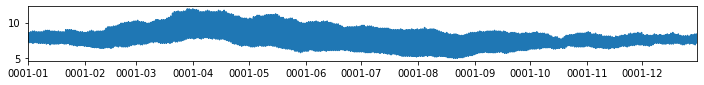

In [134]:
fig, ax = plt.subplots()
ax.set_xlim(1,365)
fig.set_size_inches(12, 1)
ax.plot(DATE[:],DATA[:,17])

